# Fake News Prediction

Creating baseline Logistic Model using training data

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv('../00_Data/train.csv.zip')
df = df.fillna(' ')
df.count()

id        20800
title     20800
author    20800
text      20800
label     20800
dtype: int64

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Add stop words

In [5]:
# Add punctuations support.
stop_words = set(stopwords.words('english'))
stop_words.update('!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~')

# Add Unicode characters support.
for i in range(1000, 1100):
    stop_words.update(chr(i))

### Split data into test and train

In [6]:
# split into training and test
train, test = train_test_split(df, test_size=0.2, random_state=6)
y_train = train['label']
y_test = test['label']

In [7]:
y_test.shape

(4160,)

In [8]:
y_train.shape

(16640,)

### 3. Use TfidfVectorizer to tranform into tf-idf features

In [9]:
# extract features
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
x_train=tfidf_vectorizer.fit_transform(train['text'])
x_test=tfidf_vectorizer.transform(test['text'])

In [10]:
print(x_train.shape, x_test.shape)

(16640, 160014) (4160, 160014)


### Fit Logistic Model

In [11]:
log_model = LogisticRegression(random_state=6
                               ,max_iter=1000
                              )
log_model.fit(x_train, y_train)
y_score = log_model.predict(x_test[:, :])

In [12]:
y_score

array([1, 0, 1, ..., 0, 0, 1])

### Compute Precision and Recall Score

In [13]:
# precision, recall, f1, and average precision below
cnf_matrix=pd.DataFrame(metrics.confusion_matrix(y_score,y_test), columns=['P-','P+'], index=['A-','A+'])
cnf_matrix

,P-,P+
A-,1971,93
A+,118,1978


In [14]:
print('Precision Score:', round(metrics.precision_score(y_test, y_score),3))
print('Recall Score:', round(metrics.recall_score(y_test, y_score),3))
print('F1 Score:', round(metrics.f1_score(y_test, y_score),3))
print('Average Precision Score:', round(metrics.average_precision_score(y_test, y_score),3))
print('Accuracy Score:', round(metrics.accuracy_score(y_test, y_score),3))

Precision Score: 0.944
Recall Score: 0.955
F1 Score: 0.949
Average Precision Score: 0.924
Accuracy Score: 0.949


### Plot Precision Recall Curve

In [15]:
y_pred_prb = log_model.predict_proba(x_test)[::,1]

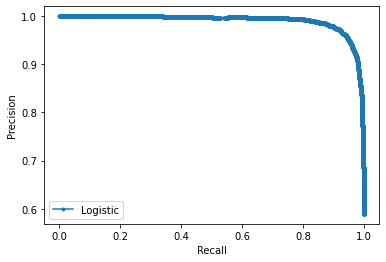

In [16]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_prb)
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

### ROC curve

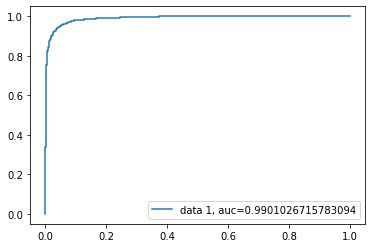

In [17]:
# Plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prb)
auc = metrics.roc_auc_score(y_test, y_pred_prb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Notes

Logistic Model has a high AUC '99.01%'. 

# Trying different Dataset

### Derived new label that buckets multiple variations of True/False into 2 buckets.

In [18]:
df1 = pd.read_csv('../00_Data/liar_dataset/train.tsv', sep='\t', header=None)
df1 = df1.fillna(' ')
df1.columns = ['ID', 'label', 'statement', 'subject','speaker',
              'speaker_job','state','party','barely_true_counts','false_counts','half_true_counts','mostly_true_counts',
             'pants_on_fire_counts','venue']
df1.count()

ID                      10240
label                   10240
statement               10240
subject                 10240
speaker                 10240
speaker_job             10240
state                   10240
party                   10240
barely_true_counts      10240
false_counts            10240
half_true_counts        10240
mostly_true_counts      10240
pants_on_fire_counts    10240
venue                   10240
dtype: int64

In [19]:
df1.label.value_counts()

half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: label, dtype: int64

In [20]:
df1.head()

,ID,label,statement,subject,speaker,speaker_job,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,venue
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0,0,0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7,19,3,5,44,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,,Florida,democrat,15,9,20,19,2,an interview on CNN


In [21]:
df1.label.value_counts()

half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: label, dtype: int64

In [22]:
true_label = ['half-true', 'mostly-true', 'true']
def derive_label(row):
    if row['label'] in true_label:
        return 1
    else:
        return 0
    
df1['derived_label'] = df1.apply(derive_label,axis=1)

In [23]:
# split into training and test
train1, test1 = train_test_split(df1, test_size=0.2, random_state=6)
y_train1 = train1['derived_label']
y_test1 = test1['derived_label']

In [24]:
# extract features
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
x_train1=tfidf_vectorizer.fit_transform(train1['statement'])
x_test1=tfidf_vectorizer.transform(test1['statement'])

In [25]:
log_model1 = LogisticRegression(random_state=6
                               ,max_iter=1000
                              )
log_model1.fit(x_train1, y_train1)
y_score1 = log_model1.predict(x_test1[:, :])

In [26]:
y_score1

array([1, 1, 1, ..., 1, 0, 1])

In [27]:
# precision, recall, f1, and average precision below
cnf_matrix=pd.DataFrame(metrics.confusion_matrix(y_score1,y_test1), columns=['P-','P+'], index=['A-','A+'])
cnf_matrix

,P-,P+
A-,413,290
A+,471,874


In [28]:
print('Precision Score:', round(metrics.precision_score(y_test1, y_score1),3))
print('Recall Score:', round(metrics.recall_score(y_test1, y_score1),3))
print('F1 Score:', round(metrics.f1_score(y_test1, y_score1),3))
print('Average Precision Score:', round(metrics.average_precision_score(y_test1, y_score1),3))
print('Accuracy Score:', round(metrics.accuracy_score(y_test1, y_score1),3))

Precision Score: 0.65
Recall Score: 0.751
F1 Score: 0.697
Average Precision Score: 0.63
Accuracy Score: 0.628


In [29]:
y_pred_prb1 = log_model1.predict_proba(x_test1)[::,1]

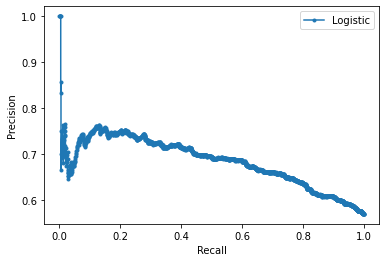

In [30]:
precision1, recall1, _ = precision_recall_curve(y_test1, y_pred_prb1)
plt.plot(recall1, precision1, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

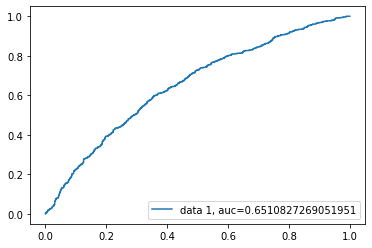

In [31]:
# Plot ROC curve
fpr1, tpr1, _ = metrics.roc_curve(y_test1,  y_pred_prb1)
auc1 = metrics.roc_auc_score(y_test1, y_pred_prb1)
plt.plot(fpr1,tpr1,label="data 1, auc="+str(auc1))
plt.legend(loc=4)
plt.show()

# Creating Multinomial Logistic Regression

In [32]:
df1['clean_statement'] = pd.Series(df1['statement'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words])))

In [33]:
df1[['statement','clean_statement']].head()

,statement,clean_statement
0,Says the Annies List political group supports ...,Says Annies List political group supports thir...
1,When did the decline of coal start? It started...,When decline coal start? It started natural ga...
2,"Hillary Clinton agrees with John McCain ""by vo...","Hillary Clinton agrees John McCain ""by voting ..."
3,Health care reform legislation is likely to ma...,Health care reform legislation likely mandate ...
4,The economic turnaround started at the end of ...,The economic turnaround started end term.


In [34]:
# split into training and test
train2, test2 = train_test_split(df1, test_size=0.2, random_state=6)
y_train2 = train2['label']
y_test2 = test2['label']

In [35]:
# extract features
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
x_train2=tfidf_vectorizer.fit_transform(train2['clean_statement'])
x_test2=tfidf_vectorizer.transform(test2['clean_statement'])

In [36]:
log_model2 = LogisticRegression(random_state=6
                               ,max_iter=1000
                              ,multi_class='auto')
log_model2.fit(x_train2, y_train2)
y_score2 = log_model2.predict(x_test2[:, :])

In [37]:
y_score2

array(['mostly-true', 'true', 'mostly-true', ..., 'half-true',
       'barely-true', 'true'], dtype=object)

In [38]:
# precision, recall, f1, and average precision below
cnf_matrix=pd.DataFrame(metrics.confusion_matrix(y_score2,y_test2))
cnf_matrix

,0,1,2,3,4,5
0,53,45,63,38,34,30
1,70,136,89,55,60,68
2,80,105,129,109,30,83
3,71,67,101,122,30,101
4,4,4,1,3,7,2
5,25,43,51,54,20,65


In [39]:
print('Precision Score:', round(metrics.precision_score(y_test2, y_score2, average='macro'),3))
print('Recall Score:', round(metrics.recall_score(y_test2, y_score2, average='macro'),3))
print('F1 Score:', round(metrics.f1_score(y_test2, y_score2, average='macro'),3))
#print('Average Precision Score:', round(metrics.average_precision_score(y_test2, y_score2, average='macro'),3))
print('Accuracy Score:', round(metrics.accuracy_score(y_test2, y_score2),3))

Precision Score: 0.26
Recall Score: 0.226
F1 Score: 0.221
Accuracy Score: 0.25


#### This will be our baseline model for research paper